In [2]:
import itertools

# Our numerical workhorses
import numpy as np
import pandas as pd
import scipy.integrate

# Import Altair for high level plotting
import altair as alt
import altair_catplot as altcat

# Import Bokeh modules for interactive plotting
import bokeh.io
import bokeh.plotting

# Set up Bokeh for inline viewing
bokeh.io.output_notebook()

# Pevent bulky altair plots
alt.data_transformers.enable('json')

Loading BokehJS ...

DataTransformerRegistry.enable('json')

In [3]:
df = pd.read_csv('../data/shao_et_al_wst-1_assay.csv', comment='#')

df.head()

,Treatment,Experiment,assay_result
0,Control,One,1.45945
1,Control,One,1.51035
2,Control,One,1.80045
3,Control,One,1.83745
4,PLA_1,One,1.42015


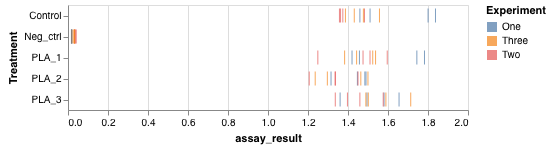

In [19]:
alt.Chart(df).mark_tick().encode(
        x='assay_result:Q',
        y='Treatment:N',
        color = alt.Color('Experiment:N'),
    )

In [21]:
E1 = df['Experiment'] == 'One'
E2 = df['Experiment'] == 'Two'
E3 = df['Experiment'] == 'Three'

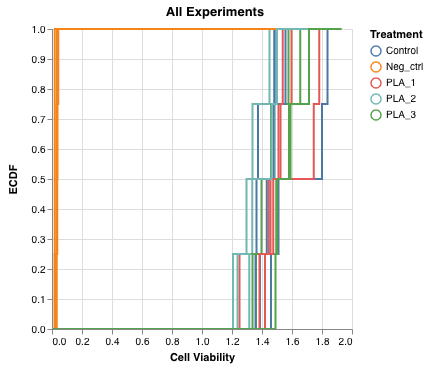

In [25]:
def make_ecdf(bool_index, title):
    c = altcat.catplot(data=df.loc[bool_index,:],
               mark='line',
               encoding=dict(x=alt.X('assay_result:Q',
                                     scale=alt.Scale(
                                           domain=(0, 2),
                                           clamp=True),
                                    title = "Cell Viability"),
                             color = alt.Color('Treatment:N', title='Treatment')),
               transform='ecdf'
              ).properties(height=300,
                           width=300,
                           title = title)
    return c

make_ecdf(E1, "All Experiments") + make_ecdf(E2, "All Experiments") + make_ecdf(E3, "All Experiments")

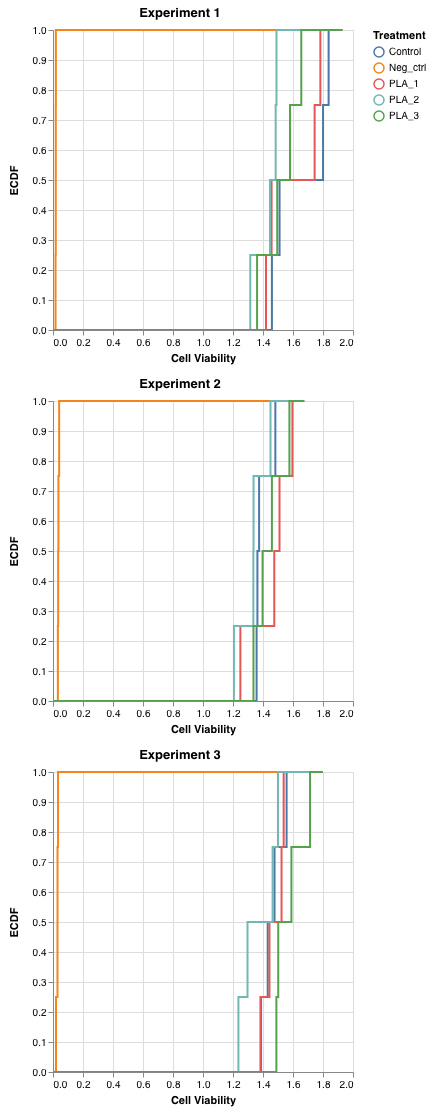

In [26]:
make_ecdf(E1, "Experiment 1") & make_ecdf(E2, "Experiment 2") & make_ecdf(E3, "Experiment 3")